# CA Data Science Take-home Problem

This is a starter R notebook for this problem. It will pull the airline data csvs and put them in a dataframe to work with. Make sure you install and choose the R kernel to run it. Please see the repository readme for more details and instructions.

In [1]:
install.packages('httr')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(httr)

## Loading the CSVs

In [3]:
csvs <- c("701878033_T_ONTIME_2015_8.csv", "701878033_T_ONTIME_2016_8.csv", "701878033_T_ONTIME_2017_8.csv")
for (csv in csvs) {
    print(paste("-- fetching", csv))
    writeBin(
        content(
            GET(paste0("http://ca-data-science-interview.s3.amazonaws.com/", csv)), 
            "raw"
        ), 
        csv
    )
}

[1] "-- fetching 701878033_T_ONTIME_2015_8.csv"
[1] "-- fetching 701878033_T_ONTIME_2016_8.csv"
[1] "-- fetching 701878033_T_ONTIME_2017_8.csv"


In [4]:
files <- list.files(path = "./", pattern = "8\\.csv$")
df <- read.csv(files[1])
for (f in files[-1]) {
    df <- rbind(df, read.csv(f))
}

df <- df[, names(df) != "X"] # All of the lines in the CSVs have an extra comma at the end that gets interpreted as an unnamed column.
head(df, 5)

YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,⋯,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2015,3,8,8,6,2015-08-08,19690,HA,N491HA,248,⋯,47,42,27,1,163,NA,NA,NA,NA,NA
2015,3,8,9,7,2015-08-09,19690,HA,N493HA,248,⋯,47,41,28,1,163,NA,NA,NA,NA,NA
2015,3,8,10,1,2015-08-10,19690,HA,N491HA,248,⋯,47,45,26,1,163,NA,NA,NA,NA,NA
2015,3,8,11,2,2015-08-11,19690,HA,N485HA,248,⋯,47,46,27,1,163,NA,NA,NA,NA,NA
2015,3,8,12,3,2015-08-12,19690,HA,N485HA,248,⋯,47,38,26,1,163,NA,NA,NA,NA,NA


## A basic view of the data

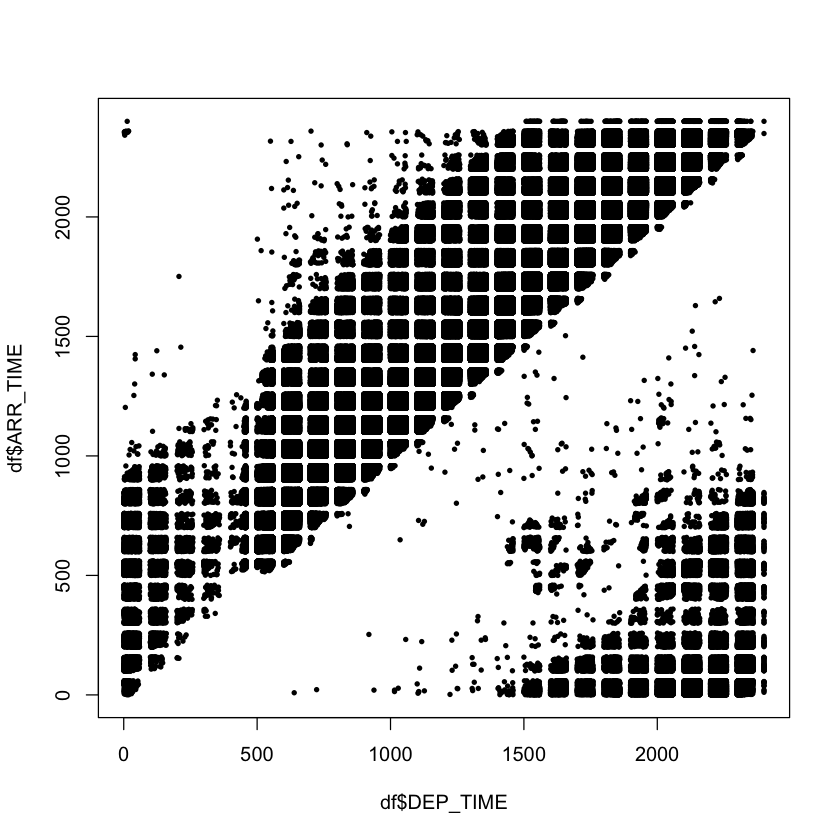

In [5]:
plot(
    df$DEP_TIME,
    df$ARR_TIME,
    pch=16,
    cex=0.6
)